In [1]:
%reload_ext autoreload
%autoreload 2  # reload all packages (for dev purposes)

In [27]:
import os
import sys
sys.path.append("..")  # add top folder to path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, precision_score
import torch
from impepdom import models

### Scenario 1 (validation)
Train on c001, c002, and c003 to validate of c004

In [3]:
model = models.MultilayerPerceptron(num_hidden_layers=2, hidden_layer_size=100)
dataset = impepdom.TrainPeptideDataset(
    hla_allele='HLA-A01:01',
    padding='flurry',
    toy=False)

In [5]:
save_folder, baseline_metrics = impepdom.run_experiment(
    model=model,
    dataset=dataset,
    train_fold_idx=[0, 1, 2],
    val_fold_idx=[3],
    learning_rate=2e-3,
    num_epochs=5,
    batch_size=128)

epoch 1/5 started at 0.0024 s
train loss: 0.0378 accuracy: 0.9913 auc: 0.8932
val loss: 0.0314 accuracy: 0.9924 auc: 0.9242

epoch 2/5 started at 16.4838 s
train loss: 0.0309 accuracy: 0.9930 auc: 0.9088
val loss: 0.0333 accuracy: 0.9919 auc: 0.9238

epoch 3/5 started at 31.9689 s
train loss: 0.0306 accuracy: 0.9929 auc: 0.9116
val loss: 0.0345 accuracy: 0.9919 auc: 0.9261

epoch 4/5 started at 47.6729 s
train loss: 0.0305 accuracy: 0.9928 auc: 0.9098
val loss: 0.0329 accuracy: 0.9924 auc: 0.9283

epoch 5/5 started at 63.2580 s
train loss: 0.0300 accuracy: 0.9930 auc: 0.9157
val loss: 0.0329 accuracy: 0.9923 auc: 0.9195

training completed in 1 m 18.7527 s
best validation auc: 0.9283


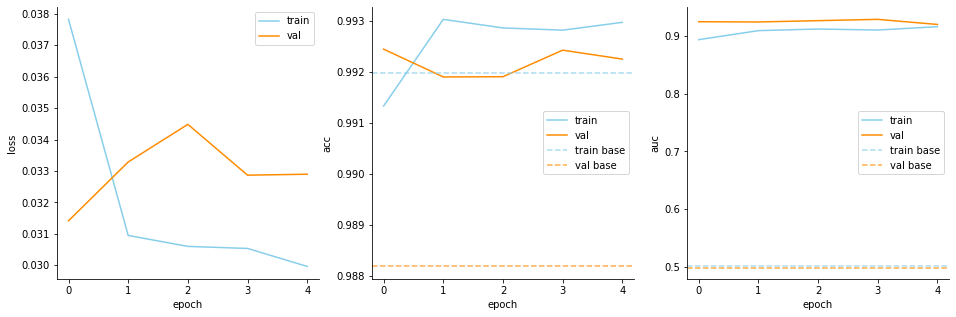

In [6]:
trained_model, train_history = impepdom.load_trained_model(model, save_folder)
impepdom.plot_train_history(train_history, baseline_metrics)

### Scenario 2 (test set)
Train on c001, c002, c003, and c004. Acquire test set metrics on c005.

In [7]:
model_2 = models.MultilayerPerceptron(num_hidden_layers=2, hidden_layer_size=100)

In [8]:
save_folder_2, baseline_metrics_2 = impepdom.run_experiment(
    model=model_2,
    dataset=dataset,
    train_fold_idx=[0, 1, 2, 3],
    # val_fold_idx=[4],
    learning_rate=2e-3,
    num_epochs=5,
    batch_size=128)

epoch 1/5 started at 0.0005 s
train loss: 0.0383 accuracy: 0.9913 auc: 0.8904

epoch 2/5 started at 18.7299 s
train loss: 0.0319 accuracy: 0.9925 auc: 0.9113

epoch 3/5 started at 36.4109 s
train loss: 0.0322 accuracy: 0.9925 auc: 0.9092

epoch 4/5 started at 54.3543 s
train loss: 0.0317 accuracy: 0.9926 auc: 0.9086

epoch 5/5 started at 73.0575 s
train loss: 0.0315 accuracy: 0.9924 auc: 0.9150

training completed in 1 m 30.1087 s
best validation auc: 0.9150


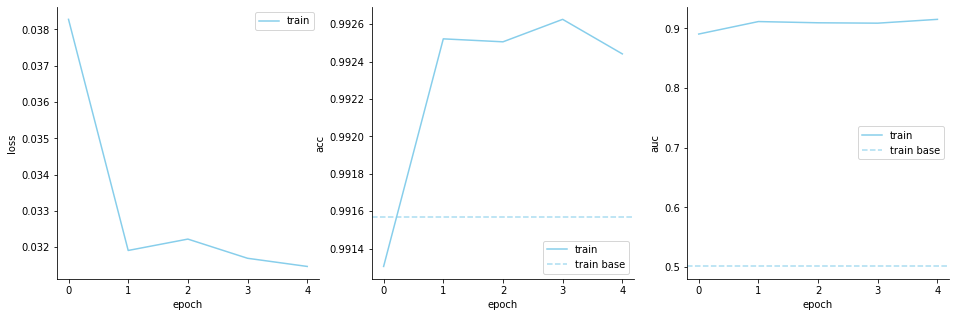

In [9]:
trained_model_2, train_history_2 = impepdom.load_trained_model(model_2, save_folder_2)
impepdom.plot_train_history(train_history_2, baseline_metrics_2)

In [10]:
X_test, y_test = dataset.get_fold(fold_idx=[4])

In [46]:
preds = model_2(torch.tensor(X_test, dtype=torch.float))
y_score = preds.detach().numpy()
y_pred = np.array(y_score > 0.1, dtype=float).flatten()

In [47]:
print('Test set AUROC: {:.4f}'.format(roc_auc_score(y_test, y_score)))
print('Test set AUC 0.1: {:.4f}'.format(roc_auc_score(y_test, y_score, max_fpr=0.1)))

Test set AUROC: 0.9275
Test set AUC 0.1: 0.8670


In [ ]:
# make a google sheet!
# try to play with parameters more
# make more layers
# generate the table
# replace flurry encoding with cnn (pad at the end, do some testing, window = 1, 3, 5 * 21) for class II -- they are not aligned
    # use 1d with 21 channels
# 9mer binding motif -> scan over the peptide
# https://www.ncbi.nlm.nih.gov/pubmed/30169744
# https://europepmc.org/article/med/28961695
# hyperparameter tuner
# test set (how many target == 1, e.g., 2149 of them) # take top 2149, how many are positive?
# more novel -> github + small text above each box in jupyter notebook, describe the process